In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [11]:
df = pd.read_csv('/Users/jkgerdts/Google Drive/2020 01-15 test timeseries.csv')
df

,person,timestamp,trial,value
0,jim,1/13/20 22:49,A,0.134355
1,jim,1/13/20 22:50,A,0.197613
2,jim,1/13/20 22:52,A,0.871374
3,jim,1/13/20 22:53,A,0.950884
4,jim,1/13/20 22:54,A,1.512712
5,jim,1/13/20 22:56,A,2.481295
6,jim,1/13/20 22:57,A,3.162309
7,jim,1/13/20 22:59,A,4.127576
8,jim,1/13/20 23:00,A,4.556111
9,jim,1/13/20 23:02,A,4.926523


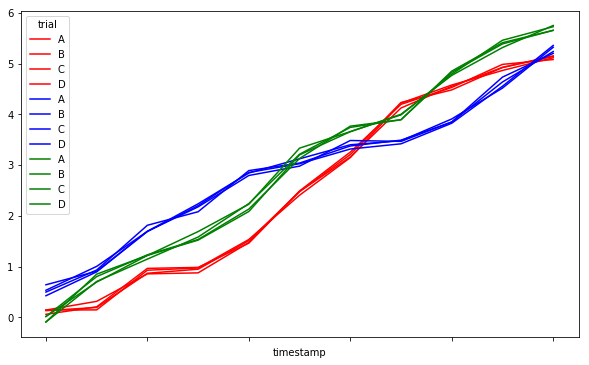

In [38]:
piv = df.pivot_table(values='value',index=['timestamp'],columns=['person','trial'])
fig, ax = plt.subplots(figsize=(10,6))
colors = ['red','blue','green']
for name, color in zip(df['person'].unique(),colors):
    piv[name].plot(ax=ax,color=color)

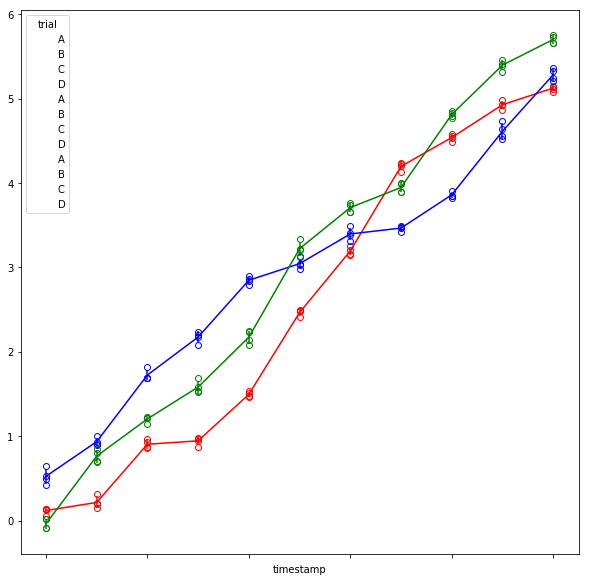

In [54]:
piv = df.pivot_table(values='value',index=['timestamp'],columns=['person','trial'])
piv_stat = df.pivot_table(values='value',index=['timestamp'],columns=['person'],aggfunc=[np.mean,np.std])
fig, ax = plt.subplots(figsize=(10,10))
colors = ['red','blue','green']
for name, color in zip(df['person'].unique(),colors):
    piv[name].plot(marker='o',ls='',ax=ax,color=color,markerfacecolor="None")
    piv_stat['mean'][name].plot(ax=ax,yerr=piv_stat['std'][name],color=color)